In [ ]:
# installing windorse module
# pip install windrose openpyxl

**Libraries**

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from windrose import WindroseAxes

**Data Set**

In [34]:
# velocity component
u = pd.read_csv('velocity_u.csv', header=None, names=['u'])
v = pd.read_csv('velocity_v.csv', header=None, names=['v'])

# velocity magnitude
mag = pd.DataFrame((np.sqrt(u.values**2 + v.values**2)), columns=['mag'])

# combine into one dataframe
df = pd.concat([u,v,mag], axis=1)

df.head()

,u,v,mag
0,0.012443,-0.003259,0.012863
1,0.001705,0.000454,0.001765
2,0.009154,0.005769,0.010820
3,0.002360,0.000628,0.002442
4,0.009812,0.003764,0.010509


**Velocity Direction**

In [37]:
df['uSign'] = np.sign(df['u'])
df['vSign'] = np.sign(df['v'])

In [38]:
df.head()

,u,v,mag,uSign,vSign
0,0.012443,-0.003259,0.012863,1.0,-1.0
1,0.001705,0.000454,0.001765,1.0,1.0
2,0.009154,0.005769,0.010820,1.0,1.0
3,0.002360,0.000628,0.002442,1.0,1.0
4,0.009812,0.003764,0.010509,1.0,1.0


In [113]:
velocityDirection = []
for i in range(len(df)):
    uSign, vSign = df.iloc[i][['uSign','vSign']]
    if (uSign > 0 and vSign > 0):
        # quadran 1
        velocityDirection.append( np.rad2deg( np.arctan( df.iloc[i]['u'] / df.iloc[i]['v'] )))
    elif (uSign > 0 and vSign < 0):
        # quadran 2
        velocityDirection.append( 90 + np.rad2deg( np.arctan( abs(df.iloc[i]['v']) / df.iloc[i]['u'] )))
    elif (uSign < 0 and vSign < 0):
        # quadran 3
        velocityDirection.append(180 + np.rad2deg( np.arctan( abs(df.iloc[i]['u']) / abs(df.iloc[i]['v']) )))
    elif (uSign < 0 and vSign > 0):
        # quadran 4
        velocityDirection.append(270 + np.rad2deg( np.arctan( df.iloc[i]['v'] / abs(df.iloc[i]['u']) )))

In [115]:
df['dir'] = pd.DataFrame(velocityDirection)

In [116]:
df.head()

,u,v,mag,uSign,vSign,dir
0,0.012443,-0.003259,0.012863,1.0,-1.0,104.675920
1,0.001705,0.000454,0.001765,1.0,1.0,75.100020
2,0.009154,0.005769,0.010820,1.0,1.0,57.778413
3,0.002360,0.000628,0.002442,1.0,1.0,75.098478
4,0.009812,0.003764,0.010509,1.0,1.0,69.011947


**Plot the Current Rose**

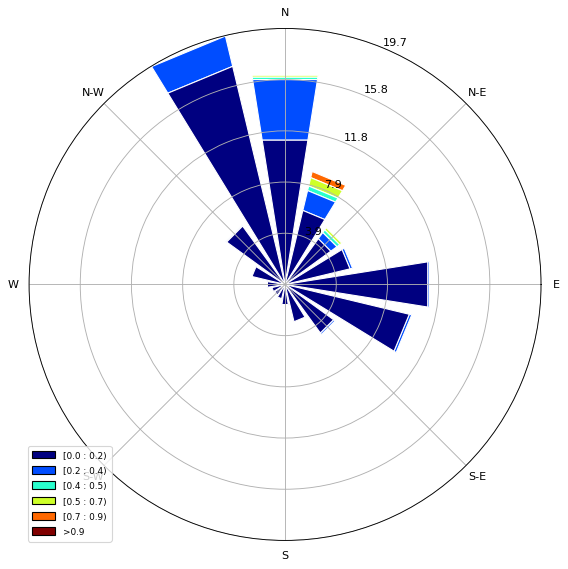

In [121]:
ax = WindroseAxes.from_ax()
ax.bar(df['dir'], df['mag'], normed=True, opening=0.8, edgecolor='white', cmap=cm.jet)
ax.set_legend()
plt.savefig('SeaSurfaceCurrentRose.png', bbox_inches='tight', dpi=150)
plt.show()

**THANK YOU**